##### Copyright 2018 The TensorFlow Authors.

In [1]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

In [2]:
#@title MIT License
#
# Copyright (c) 2017 François Chollet
#
# Permission is hereby granted, free of charge, to any person obtaining a
# copy of this software and associated documentation files (the "Software"),
# to deal in the Software without restriction, including without limitation
# the rights to use, copy, modify, merge, publish, distribute, sublicense,
# and/or sell copies of the Software, and to permit persons to whom the
# Software is furnished to do so, subject to the following conditions:
#
# The above copyright notice and this permission notice shall be included in
# all copies or substantial portions of the Software.
#
# THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
# IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
# FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL
# THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
# LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING
# FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER
# DEALINGS IN THE SOFTWARE.

# Treine sua primeira rede neural: classificação básica

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://www.tensorflow.org/tutorials/keras/classification"><img src="https://www.tensorflow.org/images/tf_logo_32px.png" />Veja em TensorFlow.org</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/tensorflow/docs-l10n/blob/master/site/pt-br/tutorials/keras/classification.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Execute em Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/tensorflow/docs-l10n/blob/master/site/pt-br/tutorials/keras/classification.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />Veja código fonte em GitHub</a>
  </td>
  <td>
    <a href="https://storage.googleapis.com/tensorflow_docs/docs-l10n/site/pt-br/tutorials/keras/classification.ipynb"><img src="https://www.tensorflow.org/images/download_logo_32px.png" />Baixe o notebook</a>
  </td>
</table>

Note: A nossa comunidade TensorFlow traduziu estes documentos. Como as traduções da comunidade são *o melhor esforço*, não há garantias de que sejam uma reflexão exata e atualizada da [documentação oficial em Inglês](https://www.tensorflow.org/?hl=en). Se tem alguma sugestão para melhorar esta tradução, por favor envie um pull request para o repositório do GitHub [tensorflow/docs](https://github.com/tensorflow/docs). Para se voluntariar para escrever ou rever as traduções da comunidade, contacte a [lista docs@tensorflow.org](https://groups.google.com/a/tensorflow.org/forum/#!forum/docs).

Este tutorial treina um modelo de rede neural para classificação de imagens de roupas, como tênis e camisetas. Tudo bem se você não entender todos os detalhes; este é um visão geral de um programa do TensorFlow com detalhes explicados enquanto progredimos.

O guia usa [tf.keras](https://www.tensorflow.org/guide/keras), uma API alto-nível para construir e treinar modelos no TensorFlow.

In [3]:
!pip install tensorflow

In [4]:
#remover warnings
import warnings
warnings.filterwarnings('ignore')

In [5]:
# TensorFlow e tf.keras
import tensorflow as tf
from tensorflow import keras

# Bibliotecas Auxiliares
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.13.0


## Importe a base de dados Fashion MNIST

Esse tutorial usa a base de dados [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist) que contém 70,000 imagens em tons de cinza em 10 categorias. As imagens mostram artigos individuais de roupas com baixa resolução (28 por 28 pixels), como vemos aqui:

<table>
  <tr><td>
    <img src="https://tensorflow.org/images/fashion-mnist-sprite.png"
         alt="Fashion MNIST sprite"  width="600">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1.</b> <a href="https://github.com/zalandoresearch/fashion-mnist">Amostras de Fashion-MNIST</a> (por Zalando, MIT License).<br/>&nbsp;
  </td></tr>
</table>

Fashion MNIST tem como intenção substituir a clássica base de dados [MNIST](http://yann.lecun.com/exdb/mnist/ )— frequentemente usada como "Hello, World" de programas de aprendizado de máquina (*machine learning*) para visão computacional. A base de dados MNIST contém imagens de dígitos escritos à mão (0, 1, 2, etc.) em um formato idêntico ao dos artigos de roupas que usaremos aqui.

Esse tutorial usa a Fashion MNIST para variar, e porque é um problema um pouco mais desafiador que o regular MNIST. Ambas bases são relativamente pequenas e são usadas para verificar se um algoritmo funciona como esperado. Elas são bons pontos de partida para testar e debugar código.

Usaremos 60,000 imagens para treinar nossa rede e 10,000 imagens para avaliar quão precisamente nossa rede aprendeu a classificar as imagens. Você pode acessar a Fashion MNIST diretamente do TensorFlow. Importe e carregue a base Fashion MNIST diretamente do TensorFlow:

In [6]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


Carregando a base de dados que retorna quatro NumPy arrays:

* Os *arrays* `train_images` e `train_labels`  são o *conjunto de treinamento*— os dados do modelo usados para aprender.
* O modelo é testado com o *conjunto de teste*, os *arrays* `test_images` e `test_labels`.

As imagens são arrays  NumPy de 28x28, com os valores de pixels entre 0 to 255. As *labels* (alvo da classificação) são um  array  de inteiros, no intervalo de  0 a 9. Esse corresponde com a classe de roupa que cada imagem representa:

<table>
  <tr>
    <th>Label</th>
    <th>Classe</th>
  </tr>
  <tr>
    <td>0</td>
    <td>Camisetas/Top (T-shirt/top)</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Calça (Trouser)</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Suéter (Pullover)</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Vestidos (Dress)</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Casaco (Coat)</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandálias (Sandal)</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Camisas (Shirt)</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Tênis (Sneaker)</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bolsa (Bag)</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Botas (Ankle boot)</td>
  </tr>
</table>

Cada imagem é mapeada com um só label. Já que o *nome das classes* não são incluídas na base de dados, armazene os dados aqui para usá-los mais tarde quando plotarmos as imagens:

In [7]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Explore os dados

Vamos explorar o formato da base de dados antes de treinar o modelo. O próximo comando mostra que existem 60000 imagens no conjunto de treinamento, e cada imagem é representada em 28 x 28 pixels:

In [8]:
train_images.shape

(60000, 28, 28)

Do mesmo modo, existem 60000 labels no conjunto de treinamento:

In [9]:
len(train_labels)

60000

Cada label é um inteiro entre 0 e 9:

In [10]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

Existem 10000 imagens no conjunto de teste. Novamente, cada imagem é representada por 28 x 28 pixels:

In [11]:
test_images.shape

(10000, 28, 28)

E um conjunto de teste contendo 10000 labels das imagens :

In [12]:
len(test_labels)

10000

## Pré-processe os dados

Os dados precisam ser pré-processados antes de treinar a rede. Se você inspecionar a primeira imagem do conjunto de treinamento, você verá que os valores dos pixels estão entre 0 e 255:

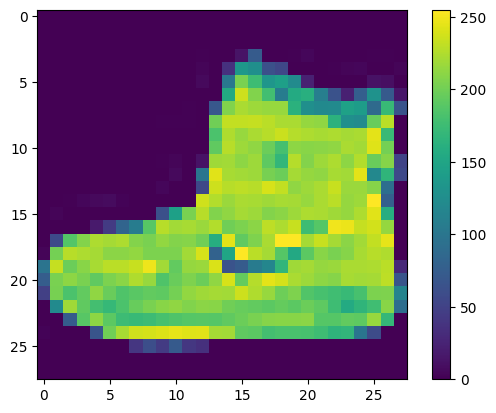

In [13]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

Escalaremos esses valores no intervalo de 0 e 1 antes de alimentar o modelo da rede neural. Para fazer isso, dividimos os valores por 255. É importante que o *conjunto de treinamento* e o *conjunto de teste* podem ser pré-processados do mesmo modo:

In [14]:
train_images = train_images / 255.0

test_images = test_images / 255.0

Para verificar que os dados estão no formato correto e que estamos prontos para construir e treinar a rede, vamos mostrar as primeiras 25 imagens do *conjunto de treinamento* e mostrar o nome das classes de cada imagem abaixo.

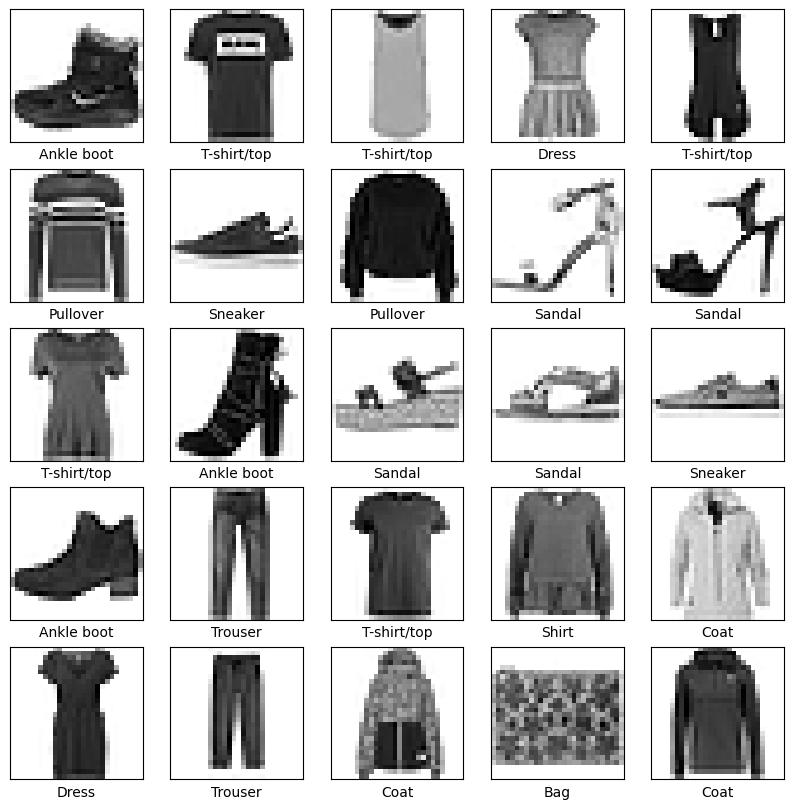

In [15]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## Construindo o modelo

Construir a rede neural requer configurar as camadas do modelo, e depois, compilar o modelo.

### Montar as camadas

O principal bloco de construção da rede neural é a camada (*layer*). As camadas (*layers*) extraem representações dos dados inseridos na rede. Com sorte, essas representações são significativas para o problema à mão.

Muito do *deep learning* consiste em encadear simples camadas. Muitas camadas, como `tf.keras.layers.Dense`, tem parâmetros que são aprendidos durante o treinamento.

In [16]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

A primeira camada da rede, `tf.keras.layers.Flatten`, transforma o formato da imagem de um array de imagens de duas dimensões (of 28 by 28 pixels) para um array de uma dimensão (de 28 * 28 = 784 pixels). Pense nessa camada como camadas não empilhadas de pixels de uma imagem e os enfilere. Essa camada não tem parâmetros para aprender; ela só reformata os dados.

Depois dos pixels serem achatados, a rede consiste de uma sequência de duas camadas `tf.keras.layers.Dense`. Essas são camadas neurais *densely connected*, ou *fully connected*. A primeira camada `Dense` tem 128 nós (ou neurônios). A segunda (e última) camada é uma *softmax*  de 10 nós que retorna um array de 10 probabilidades, cuja soma resulta em 1. Cada nó contém um valor que indica a probabilidade de que aquela imagem pertence a uma das 10 classes.

### Compile o modelo

Antes do modelo estar pronto para o treinamento, é necessário algumas configurações a mais. Essas serão adicionadas no passo de *compilação*:

* *Função Loss* —Essa mede quão precisa o modelo é durante o treinamento. Queremos minimizar a função para *guiar* o modelo para a direção certa.
* *Optimizer* —Isso é como o modelo se atualiza com base no dado que ele vê e sua função *loss*.
* *Métricas* —usadas para monitorar os passos de treinamento e teste. O exemplo abaixo usa a *acurácia*, a fração das imagens que foram classificadas corretamente.

In [17]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Treine o modelo

Treinar a rede neural requer os seguintes passos:

1. Alimente com os dados de treinamento, o modelo. Neste exemplo, os dados de treinamento são os arrays `train_images` e `train_labels`.
2. O modelo aprende como associar as imagens as *labels*.
3. Perguntamos ao modelo para fazer previsões sobre o conjunto de teste — nesse exemplo, o array `test_images`. Verificamos se as previsões combinaram com as *labels*  do array `test_labels`.

Para começar a treinar, chame o método `model.fit`— assim chamado, porque ele "encaixa" o modelo no conjunto de treinamento:

In [18]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 10s 2ms/step - loss: 0.5010 - accuracy: 0.8232
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3778 - accuracy: 0.8631
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3354 - accuracy: 0.8769
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3126 - accuracy: 0.8851
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2983 - accuracy: 0.8889
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2826 - accuracy: 0.8956
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2694 - accuracy: 0.9004
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2580 - accuracy: 0.9037
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2513 - accuracy: 0.9067
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.24

À medida que o modelo treina, as métricas loss e acurácia são mostradas. O modelo atinge uma acurácia de 0.88 (ou 88%) com o conjunto de treinamento.

## Avalie a acurácia

Depois, compare como o modelo performou com o conjunto de teste:

In [19]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.3382 - accuracy: 0.8849 - 610ms/epoch - 2ms/step

Test accuracy: 0.8848999738693237


Acabou que o a acurácia com o conjunto de teste é um pouco menor do que a acurácia de treinamento. Essa diferença entre as duas acurácias representa um *overfitting*. Overfitting é modelo de aprendizado de máquina performou de maneira pior em um conjunto de entradas novas, e não usadas anteriormente, que usando o conjunto de treinamento.

## Faça predições

Com o modelo treinado, o usaremos para predições de algumas imagens.

In [20]:
predictions = model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


Aqui, o modelo previu que a *label* de cada imagem no conjunto de treinamento. Vamos olhar na primeira predição:

In [21]:
predictions[0]

array([4.2081796e-05, 1.0857088e-12, 3.0711715e-07, 2.2596245e-08,
       1.4685222e-07, 4.1417114e-04, 4.9534347e-06, 9.9947937e-02,
       1.2904337e-07, 8.9959025e-01], dtype=float32)

A predição é um array de 10 números. Eles representam um a *confiança* do modelo que a imagem corresponde a cada um dos diferentes artigos de roupa. Podemos ver cada *label*  tem um maior valor de confiança:

In [22]:
np.argmax(predictions[0])

9

Então, o modelo é confiante de que esse imagem é uma bota (ankle boot) ou `class_names[9]`. Examinando a label do teste, vemos que essa classificação é correta:

In [23]:
test_labels[0]

9

Podemos mostrar graficamente como se parece em um conjunto total de previsão de 10 classes.

In [24]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

Vamos olhar a previsão imagem na posição 0, do array de predição.

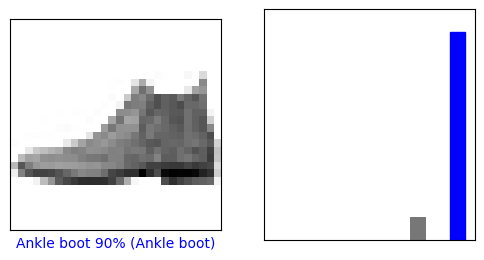

In [25]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

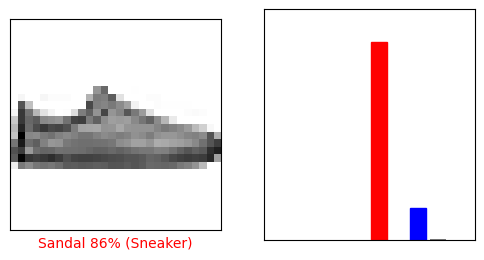

In [26]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

Vamos plotar algumas da previsão do modelo. Labels preditas corretamente são azuis e as predições erradas são vermelhas. O número dá a porcentagem (de 100) das labels preditas. Note que o modelo pode errar mesmo estando confiante.

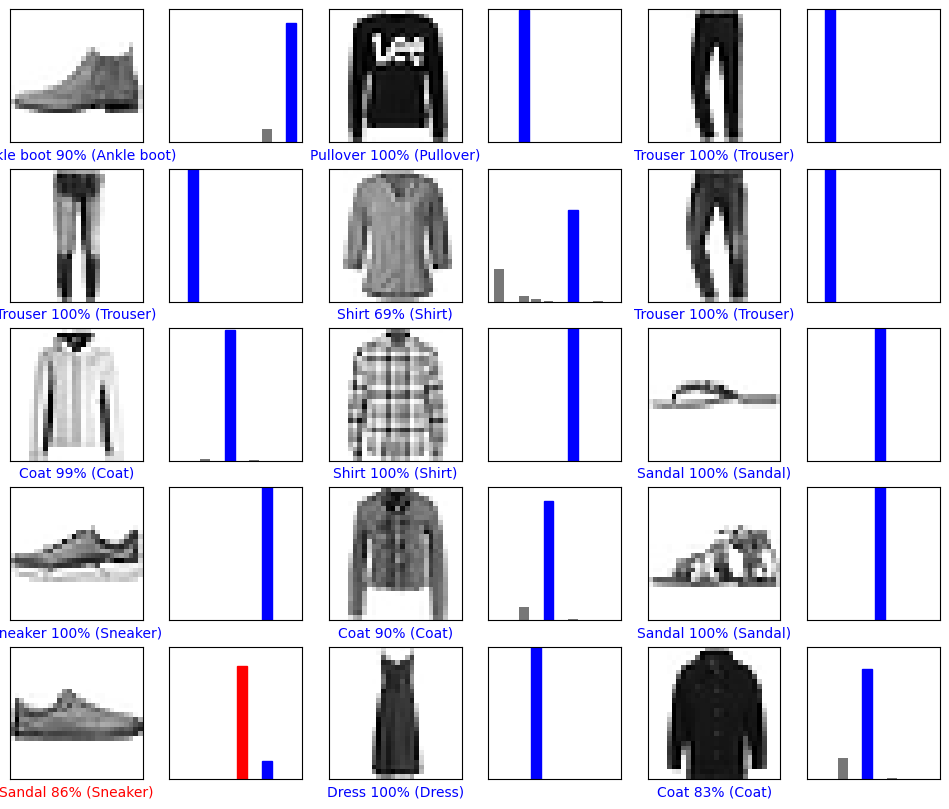

In [27]:
# Plota o primeiro X test images, e as labels preditas, e as labels verdadeiras.
# Colore as predições corretas de azul e as incorretas de vermelho.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()

Finamente, use o modelo treinado para fazer a predição de uma única imagem.

In [28]:
# Grab an image from the test dataset.
img = test_images[0]

print(img.shape)

(28, 28)


Modelos `tf.keras` são otimizados para fazer predições em um *batch*, ou coleções, de exemplos de uma vez. De acordo, mesmo que usemos uma única imagem, precisamos adicionar em uma lista:

In [29]:
# Adiciona a imagem em um batch que possui um só membro.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


Agora prediremos a label correta para essa imagem:

In [30]:
predictions_single = model.predict(img)

print(predictions_single)

1/1 [==============================] - 0s 25ms/step
[[4.20331271e-05 1.08184392e-12 3.06743544e-07 2.26103118e-08
  1.46264313e-07 4.14006732e-04 4.94941469e-06 1.00031726e-01
  1.29139110e-07 8.99506688e-01]]


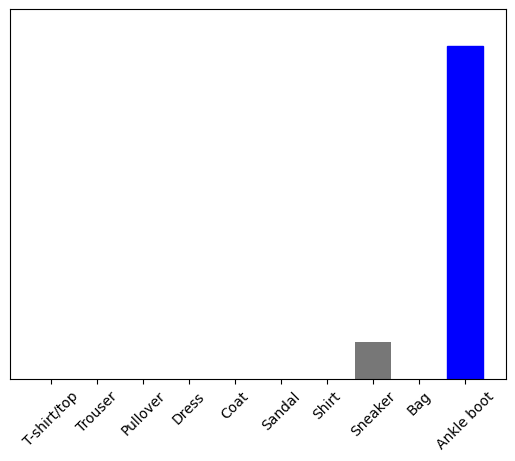

In [31]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

`model.predict` retorna a lista de listas — uma lista para cada imagem em um *batch* de dados. Pegue a predição de nossa (única) imagem no *batch*:

In [32]:
np.argmax(predictions_single[0])

9

E, como antes, o modelo previu a label como 9.

## Exercícios:

### 1) Repita as análises acima, porém utilizando as train/dev/test splits e plotando as curvas de treinamento (train/ val)
ps: em dúvida veja colab da aula de terça: https://colab.research.google.com/drive/10AtdPGFZeZukNEJDG9ab2kJ_ZObQ5Uvg

In [33]:
# Importa a função `train_test_split` do módulo `model_selection` do pacote `sklearn`.
# Esta função é frequentemente utilizada para dividir conjuntos de dados em subconjuntos de treinamento e teste.
from sklearn.model_selection import train_test_split

In [34]:
# Dividindo os dados de teste em dois subconjuntos: teste e validação.
# A função `train_test_split` é usada para essa divisão. 
# O parâmetro `test_size=0.5` indica que 50% dos dados serão usados para validação, 
# enquanto os outros 50% permanecerão como teste.
# O parâmetro `random_state=42` garante reprodutibilidade na divisão, de modo que o 
# mesmo conjunto de dados sempre será dividido da mesma forma em execuções subsequentes.
test_images, val_images, test_labels, val_labels = train_test_split(test_images, test_labels, test_size=0.5, random_state=42)

# Imprime as dimensões dos conjuntos de teste e validação após a divisão.
test_images.shape, val_images.shape, test_labels.shape, val_labels.shape

((5000, 28, 28), (5000, 28, 28), (5000,), (5000,))

In [35]:
# Definindo o modelo sequencial usando Keras
model = keras.Sequential([
                            # Camada de achatamento: Transforma a imagem 2D de 28x28 pixels em um vetor 1D de 784 elementos
                            keras.layers.Flatten(input_shape=(28, 28)),
                            
                            # Camada densamente conectada (ou "fully connected") com 128 unidades/neurônios e função de ativação ReLU
                            keras.layers.Dense(128, activation='relu'),
                            
                            # Camada de saída densamente conectada com 10 unidades/neurônios (para as 10 classes de roupas)
                            # Função de ativação softmax é usada para obter probabilidades de cada classe
                            keras.layers.Dense(10, activation='softmax')
                        ])

In [36]:
# Compilando o modelo
model.compile(
    # Otimizador 'adam' é usado para atualizar os pesos do modelo com base nos dados de treinamento
    optimizer='adam',
    
    # Função de perda 'sparse_categorical_crossentropy' é usada porque temos inteiros como rótulos e 
    # o problema é de classificação multi-classe
    loss='sparse_categorical_crossentropy',
    
    # A métrica 'accuracy' (acurácia) é usada para monitorar a performance do modelo durante o treinamento e validação
    metrics=['accuracy']
)

In [37]:
# Treinando o modelo
history = model.fit(
    # Imagens de treinamento
    train_images, 
    
    # Rótulos de treinamento
    train_labels, 
    
    # Número de épocas: quantas vezes o modelo verá todo o conjunto de treinamento
    epochs=10, 
    
    # Dados de validação: o modelo também será avaliado nesses dados após cada época
    validation_data=(val_images, val_labels)
)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4977 - accuracy: 0.8256 - val_loss: 0.4215 - val_accuracy: 0.8520
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3735 - accuracy: 0.8662 - val_loss: 0.4051 - val_accuracy: 0.8488
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3341 - accuracy: 0.8789 - val_loss: 0.3786 - val_accuracy: 0.8664
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3104 - accuracy: 0.8857 - val_loss: 0.3566 - val_accuracy: 0.8736
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2924 - accuracy: 0.8932 - val_loss: 0.3608 - val_accuracy: 0.8692
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2806 - accuracy: 0.8964 - val_loss: 0.3369 - val_accuracy: 0.8768
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2674 - accuracy: 0.9014 - val_loss: 0.3499 - val_accuracy:

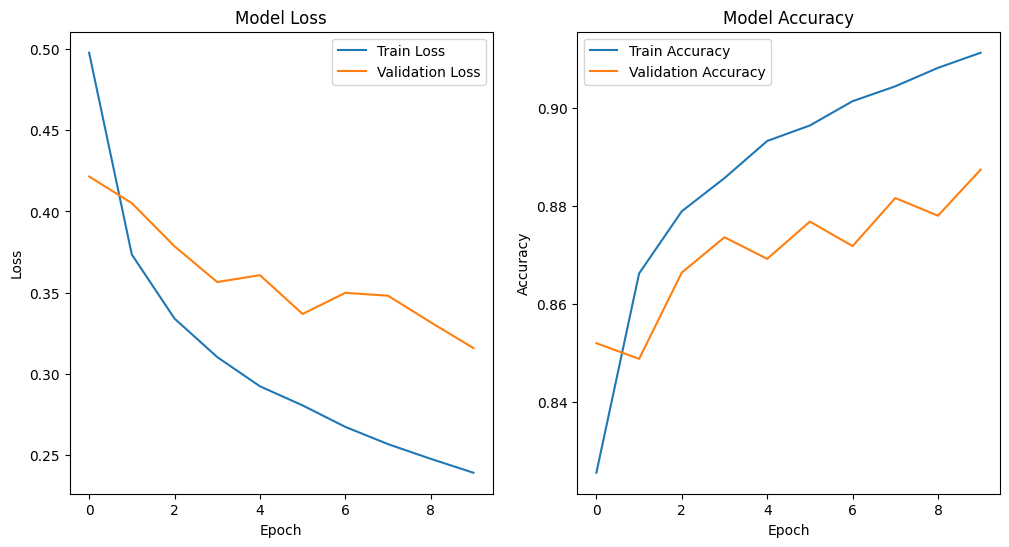

In [38]:
import matplotlib.pyplot as plt

# Extract training and validation history
loss = history.history['loss']
val_loss = history.history['val_loss']
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Create subplots for loss and accuracy
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot training and validation loss values
ax1.plot(loss, label='Train Loss')
ax1.plot(val_loss, label='Validation Loss')
ax1.set_title('Model Loss')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.legend()

# Plot training and validation accuracy values
ax2.plot(accuracy, label='Train Accuracy')
ax2.plot(val_accuracy, label='Validation Accuracy')
ax2.set_title('Model Accuracy')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy')
ax2.legend()

plt.show()

2) Realize experimentos realizando hyperparameter tuning com a mesma abrangência do exercício 1. Algumas dicas abaixo:
* learning rate
* qde layers
* num de unidades em cada layer
* batch size
* métodos de regularização: L2, early stopping, dropout...
* etc
* escreva em comentários e markdowns para guiar o leitor com seus experimentos - dica PEP8 styleguides: https://peps.python.org/pep-0008/

#### Etapa 1: Ajuste da Learning Rate

O otimizador Adam é conhecido por ser bastante robusto, mas ajustar sua taxa de aprendizado pode, às vezes, resultar em melhorias no desempenho do modelo. Vamos experimentar algumas taxas de aprendizado diferentes para ver como elas impactam o treinamento e o desempenho de validação do modelo.

Para fins de demonstração, consideraremos as seguintes taxas de aprendizado: 0.1, 0.01, 0.001 e 0.0001.

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 1.6617 - accuracy: 0.4123 - val_loss: 1.4553 - val_accuracy: 0.4190
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.8937 - accuracy: 0.2935 - val_loss: 2.1943 - val_accuracy: 0.2072
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.0834 - accuracy: 0.2152 - val_loss: 2.2069 - val_accuracy: 0.1492
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.1273 - accuracy: 0.1885 - val_loss: 2.1249 - val_accuracy: 0.2168
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.1564 - accuracy: 0.2004 - val_loss: 2.0712 - val_accuracy: 0.2048
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.1052 - accuracy: 0.1952 - val_loss: 2.1066 - val_accuracy: 0.1934
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.1568 - accuracy: 0.1822 - val_loss: 2.0860 - val_accuracy:

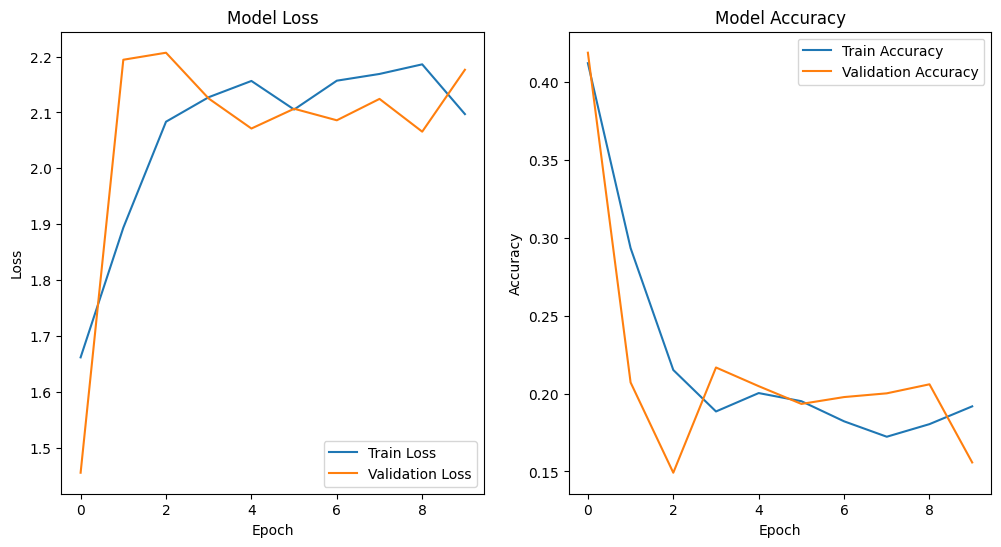

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5230 - accuracy: 0.8129 - val_loss: 0.4429 - val_accuracy: 0.8452
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4245 - accuracy: 0.8455 - val_loss: 0.4957 - val_accuracy: 0.8300
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4059 - accuracy: 0.8544 - val_loss: 0.4506 - val_accuracy: 0.8472
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3897 - accuracy: 0.8586 - val_loss: 0.4350 - val_accuracy: 0.8484
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3858 - accuracy: 0.8608 - val_loss: 0.4384 - val_accuracy: 0.8436
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3763 - accuracy: 0.8651 - val_loss: 0.5363 - val_accuracy: 0.8028
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3690 - accuracy: 0.8673 - val_loss: 0.4264 - val_accuracy:

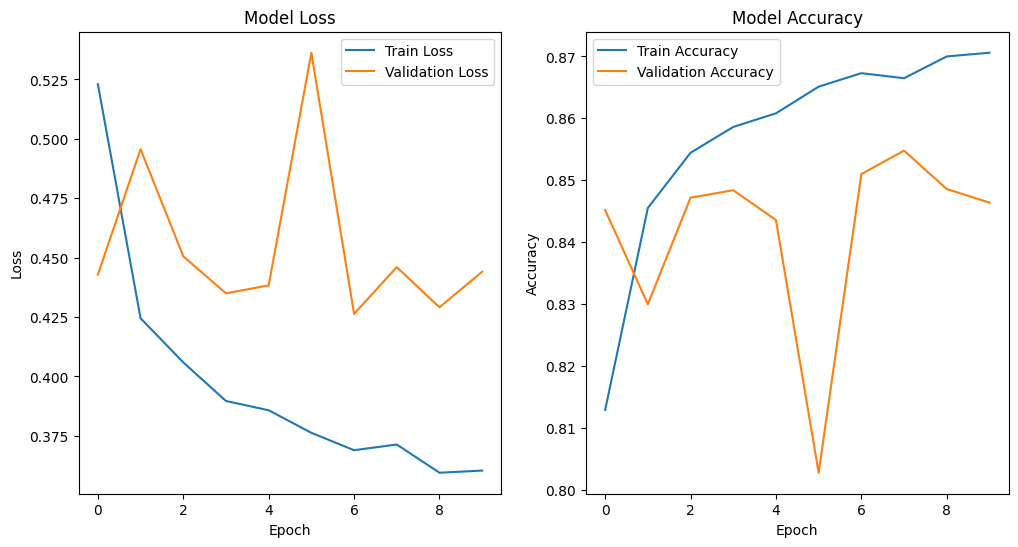

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4999 - accuracy: 0.8251 - val_loss: 0.4113 - val_accuracy: 0.8498
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3748 - accuracy: 0.8640 - val_loss: 0.3781 - val_accuracy: 0.8668
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3362 - accuracy: 0.8776 - val_loss: 0.3643 - val_accuracy: 0.8692
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3106 - accuracy: 0.8855 - val_loss: 0.3809 - val_accuracy: 0.8616
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2949 - accuracy: 0.8914 - val_loss: 0.3295 - val_accuracy: 0.8770
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2808 - accuracy: 0.8956 - val_loss: 0.3452 - val_accuracy: 0.8736
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2678 - accuracy: 0.9017 - val_loss: 0.3242 - val_accuracy:

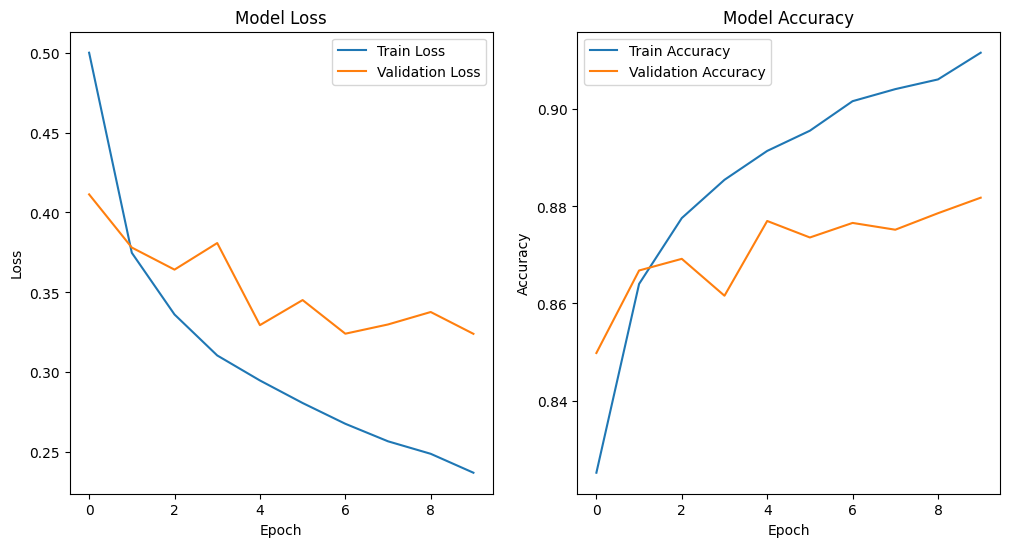

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.6947 - accuracy: 0.7752 - val_loss: 0.5261 - val_accuracy: 0.8218
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4719 - accuracy: 0.8406 - val_loss: 0.4728 - val_accuracy: 0.8356
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4284 - accuracy: 0.8529 - val_loss: 0.4431 - val_accuracy: 0.8444
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4029 - accuracy: 0.8609 - val_loss: 0.4183 - val_accuracy: 0.8526
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3862 - accuracy: 0.8669 - val_loss: 0.4103 - val_accuracy: 0.8544
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3723 - accuracy: 0.8713 - val_loss: 0.3982 - val_accuracy: 0.8602
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3609 - accuracy: 0.8741 - val_loss: 0.3939 - val_accuracy:

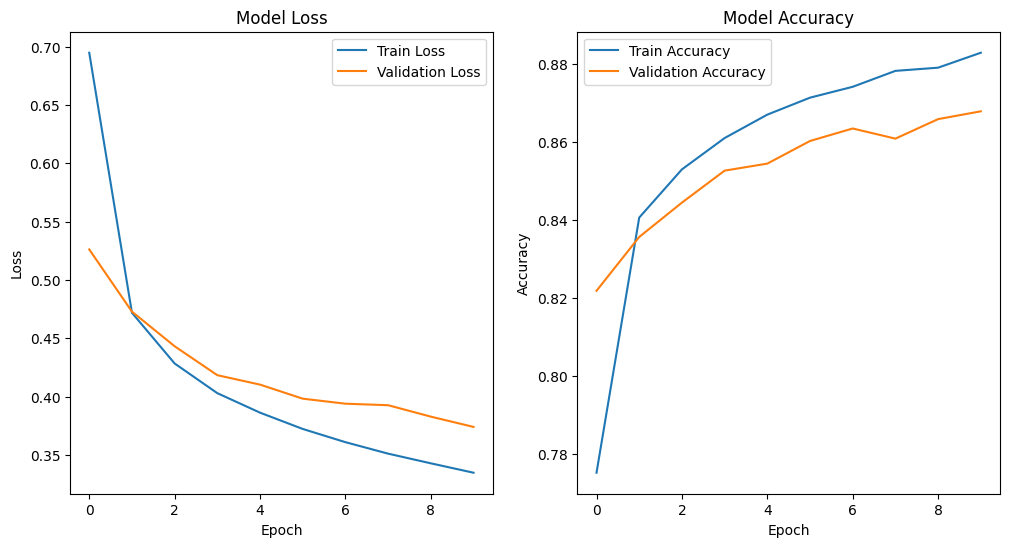

In [39]:
# Lista das diferentes taxas de aprendizado que serão testadas
taxas_aprendizado = [0.1, 0.01, 0.001, 0.0001]

# Itera sobre cada taxa de aprendizado
for taxa in taxas_aprendizado:
    
    # Criação do modelo sequencial
    model = keras.Sequential([
        # Camada de achatamento das imagens 28x28 para vetor 784
        keras.layers.Flatten(input_shape=(28, 28)),
        
        # Camada densa com 128 neurônios e ativação ReLU
        keras.layers.Dense(128, activation='relu'),
        
        # Camada de saída com 10 neurônios (para as 10 classes) e ativação softmax
        keras.layers.Dense(10, activation='softmax')
    ])

    # Configuração do otimizador Adam com a taxa de aprendizado atual
    otimizador = keras.optimizers.Adam(learning_rate=taxa)

    # Compilação do modelo
    model.compile(optimizer=otimizador,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    # Treinamento do modelo com dados de treino e validação
    history = model.fit(train_images, train_labels, epochs=10, validation_data=(val_images, val_labels))

    # Extração do histórico de treinamento e validação
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']

    # Criação de subplots para perda e acurácia
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

    # Plotagem da perda de treinamento e validação
    ax1.plot(loss, label='Train Loss')
    ax1.plot(val_loss, label='Validation Loss')
    ax1.set_title('Model Loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Loss')
    ax1.legend()

    # Plotagem da acurácia de treinamento e validação
    ax2.plot(accuracy, label='Train Accuracy')
    ax2.plot(val_accuracy, label='Validation Accuracy')
    ax2.set_title('Model Accuracy')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy')
    ax2.legend()

    # Exibição dos gráficos
    plt.show()

1. **Taxa de aprendizado: 0.1**
   - O modelo não está convergindo bem. O valor da perda (loss) e a acurácia não estão melhorando consistentemente ao longo das épocas. Isso sugere que a taxa de aprendizado pode ser alta demais, fazendo com que o modelo oscile em torno do mínimo da função de perda ou até mesmo se afaste dele.

2. **Taxa de aprendizado: 0.01**
   - O modelo está convergindo de maneira mais estável do que o anterior. A acurácia de treinamento e validação está aumentando, e o valor da perda está diminuindo. Entretanto, há sinais de que o modelo pode estar começando a sofrer de overfitting, pois a perda de validação começa a aumentar nas últimas épocas enquanto a perda de treinamento continua a diminuir.

3. **Taxa de aprendizado: 0.001**
   - Esta parece ser a taxa de aprendizado mais adequada entre as opções fornecidas. O modelo converge de forma estável, alcançando uma boa acurácia tanto no conjunto de treinamento quanto no de validação. A perda de treinamento e validação diminui consistentemente ao longo das épocas.

4. **Taxa de aprendizado: 0.0001**
   - O modelo também está convergindo, mas mais lentamente do que o modelo com taxa de aprendizado de 0.001. Apesar disso, ele apresenta bons resultados no final das 10 épocas, mas talvez pudesse se beneficiar de mais épocas de treinamento, considerando a taxa de aprendizado mais lenta.

**Resumindo**: A taxa de aprendizado de 0.001 parece ser a mais adequada para este problema específico, considerando os resultados fornecidos. No entanto, sempre é uma boa prática realizar uma validação cruzada ou outros métodos de avaliação para confirmar a robustez do modelo em diferentes conjuntos de dados.

### Plano de Experimentação:

Para otimizar o desempenho de um modelo de rede neural, é crucial experimentar diferentes combinações de hiperparâmetros. Aqui está um plano detalhado de experimentação, com base nas diretrizes fornecidas:

#### 1. **Learning Rate (Taxa de Aprendizado):**

O learning rate é um dos hiperparâmetros mais críticos na otimização de redes neurais. Ele determina o tamanho do passo que o otimizador leva em cada iteração.

- **Valores a serem testados**: 
  - 0.1
  - 0.01
  - 0.001
  - 0.0001

#### 2. **Quantidade de Layers e Unidades em cada Layer:**

A profundidade e a largura da rede podem afetar significativamente o desempenho. Redes mais profundas podem representar funções mais complexas, mas também são mais propensas ao overfitting e requerem mais dados.

- **Número de camadas a serem testadas**: 1, 2, 3.
- **Unidades por camada**: 
  - 32
  - 64
  - 128

#### 3. **Batch Size:**

O tamanho do lote pode afetar a velocidade de convergência e a estabilidade do treinamento. Tamanhos de lote menores tendem a proporcionar atualizações mais frequentes e podem levar a uma convergência mais rápida, mas também podem ser mais instáveis.

- **Valores a serem testados**: 
  - 32
  - 64
  - 128

#### 4. **Métodos de Regularização:**

A regularização ajuda a prevenir o overfitting, permitindo que o modelo generalize melhor para dados não vistos.

- **L2 Regularization**: Adiciona uma penalidade à função de custo com base no tamanho dos pesos. Isso impede que os pesos cresçam demais, o que pode causar overfitting.
  - **Valores de lambda a serem testados**: 
    - 0.01
    - 0.001
    - 0.0001

- **Dropout**: Durante o treinamento, o dropout "desliga" aleatoriamente uma fração dos neurônios em uma camada, o que ajuda a prevenir a co-adaptação de neurônios e o overfitting.
  - **Taxas a serem testadas**:
    - 0.2
    - 0.5

- **Early Stopping**: Monitora uma métrica (geralmente a perda de validação) e interrompe o treinamento se essa métrica não melhorar por um número específico de épocas consecutivas. Isso ajuda a evitar o overfitting e reduz o tempo de treinamento.
  - **Paciência**: 3 épocas

In [40]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping

def create_model(learning_rate=0.001, num_layers=1, units_per_layer=128, l2_lambda=0.01, dropout_rate=0.2):
    """
    Cria um modelo sequencial com base nos hiperparâmetros fornecidos.
    
    Parâmetros:
    - learning_rate (float): taxa de aprendizado para o otimizador.
    - num_layers (int): número de camadas densas no modelo.
    - units_per_layer (int): número de neurônios em cada camada densa.
    - l2_lambda (float): fator de regularização L2 para as camadas densas.
    - dropout_rate (float): taxa de dropout após cada camada densa.
    
    Retorna:
    - model: modelo sequencial do Keras.
    """
    model = Sequential(keras.layers.Flatten(input_shape=(28, 28)))

    # Adicionando a camada de entrada com regularização L2
    model.add(Dense(units_per_layer, activation='relu', kernel_regularizer=l2(l2_lambda), input_shape=(784,)))

    # Adicionando camadas ocultas, conforme o número especificado
    for _ in range(num_layers - 1):  # já adicionamos uma camada acima
        model.add(Dense(units_per_layer, activation='relu', kernel_regularizer=l2(l2_lambda)))
        
        # Adicionando dropout após cada camada densa, se especificado
        model.add(Dropout(dropout_rate))

    # Adicionando a camada de saída com 10 neurônios (para 10 classes)
    model.add(Dense(10, activation='softmax'))

    # Compilando o modelo com otimizador Adam e métricas especificadas
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    return model

In [43]:
# Definindo valores de hiperparâmetros para experimentação
learning_rates = [0.001]
num_layers_options = [1, 2, 3]
units_per_layer_options = [32, 64, 128]
l2_lambdas = [0.0001]
dropout_rates = [0, 0.2, 0.5]
batch_sizes = [128, 256]

# Placeholder para armazenar os resultados
results = []

# Loop através das combinações de hiperparâmetros
for lr in learning_rates:
    for num_layers in num_layers_options:
        for units in units_per_layer_options:
            for l2_lambda in l2_lambdas:
                for dropout_rate in dropout_rates:
                    for batch_size in batch_sizes:
                        # Criando o modelo com a combinação de hiperparâmetros atual
                        model = create_model(learning_rate=lr, num_layers=num_layers,
                                             units_per_layer=units, l2_lambda=l2_lambda,
                                             dropout_rate=dropout_rate)

                        # Utilizando early stopping para interromper treinamento se 'val_loss' parar de melhorar
                        early_stopping = EarlyStopping(monitor='val_loss', patience=3)

                        # Treinando o modelo
                        history = model.fit(train_images, train_labels, validation_data=(val_images, val_labels),
                                            epochs=100, batch_size=batch_size, callbacks=[early_stopping], verbose=0)

                        # Armazenando os resultados
                        val_accuracy = history.history['val_accuracy'][-1]
                        train_accuracy = history.history['accuracy'][-1]
                        diff_accuracy = train_accuracy - val_accuracy
                        results.append((lr, num_layers, units, l2_lambda, dropout_rate, batch_size, val_accuracy))

                        # Exibindo o progresso atual
                        print(f"Learning Rate: {lr}, Layers: {num_layers}, Units: {units}, L2: {l2_lambda}, "
                              f"Dropout: {dropout_rate}, Batch Size: {batch_size}, Train Accuracy: {train_accuracy:.4f}, "
                              f"Val Accuracy: {val_accuracy:.4f}, Difference: {diff_accuracy:.4f}")

# Ordenando os resultados pela acurácia de validação e exibindo o melhor resultado
sorted_results = sorted(results, key=lambda x: x[-1], reverse=True)
print("\nMelhor combinação de hiperparâmetros:")
print("Learning Rate, Num Layers, Units per Layer, L2 Lambda, Dropout Rate, Batch Size, Validation Accuracy")
print(sorted_results[0])


Learning Rate: 0.001, Layers: 1, Units: 32, L2: 0.0001, Dropout: 0, Batch Size: 128, Train Accuracy: 0.8881, Val Accuracy: 0.8704, Difference: 0.0177
Learning Rate: 0.001, Layers: 1, Units: 32, L2: 0.0001, Dropout: 0, Batch Size: 256, Train Accuracy: 0.8879, Val Accuracy: 0.8606, Difference: 0.0273
Learning Rate: 0.001, Layers: 1, Units: 32, L2: 0.0001, Dropout: 0.2, Batch Size: 128, Train Accuracy: 0.8858, Val Accuracy: 0.8644, Difference: 0.0214
Learning Rate: 0.001, Layers: 1, Units: 32, L2: 0.0001, Dropout: 0.2, Batch Size: 256, Train Accuracy: 0.8840, Val Accuracy: 0.8638, Difference: 0.0202
Learning Rate: 0.001, Layers: 1, Units: 32, L2: 0.0001, Dropout: 0.5, Batch Size: 128, Train Accuracy: 0.8834, Val Accuracy: 0.8640, Difference: 0.0193
Learning Rate: 0.001, Layers: 1, Units: 32, L2: 0.0001, Dropout: 0.5, Batch Size: 256, Train Accuracy: 0.8921, Val Accuracy: 0.8712, Difference: 0.0209
Learning Rate: 0.001, Layers: 1, Units: 64, L2: 0.0001, Dropout: 0, Batch Size: 128, Train A

### Análise dos Resultados de Treinamento

Os resultados apresentados fornecem uma visão detalhada de como diferentes combinações de hiperparâmetros afetam o desempenho de um modelo de rede neural.

Aqui está uma análise detalhada:

1. **Learning Rate (Taxa de Aprendizado)**: Todos os modelos foram treinados com uma taxa de aprendizado de 0.001. A taxa de aprendizado determina o tamanho dos passos durante a otimização. Uma taxa muito alta pode fazer com que o treinamento salte os mínimos locais, enquanto uma taxa muito baixa pode tornar o treinamento muito lento.

2. **Layers (Camadas)**: Os modelos foram treinados com diferentes números de camadas (1, 2 ou 3). Em geral, mais camadas podem permitir que a rede capture relações mais complexas, mas também aumenta o risco de overfitting.

3. **Units per Layer (Unidades por Camada)**: Variações no número de unidades (neurônios) por camada também foram testadas (32, 64, 128). Mais unidades podem fornecer mais capacidade ao modelo, mas também aumenta o risco de overfitting.

4. **L2 Lambda**: Todos os modelos usaram uma regularização L2 com um lambda de 0.0001. A regularização L2 ajuda a evitar overfitting, adicionando uma penalidade ao tamanho dos pesos na função de custo.

5. **Dropout Rate (Taxa de Descarte)**: Diferentes taxas de dropout (0, 0.2, 0.5) foram aplicadas. O dropout é uma técnica de regularização onde certos neurônios são "desligados" durante o treinamento, o que ajuda a evitar a dependência excessiva de qualquer neurônio individual.

6. **Batch Size (Tamanho do Lote)**: Foram testados dois tamanhos de lote (128, 256). O tamanho do lote afeta a velocidade e a estabilidade do treinamento. Lotes maiores podem acelerar o treinamento, mas também podem levar a uma convergência menos estável.

7. **Train Accuracy vs. Val Accuracy (Acurácia de Treino vs. Acurácia de Validação)**: A diferença entre essas acurácias pode indicar se o modelo está sofrendo de overfitting (quando a acurácia de treino é significativamente maior que a de validação).

### Conclusão:

A melhor combinação de hiperparâmetros, com base na acurácia de validação, foi:
- Taxa de Aprendizado: 0.001
- Número de Camadas: 2
- Unidades por Camada: 128
- L2 Lambda: 0.0001
- Taxa de Descarte: 0
- Tamanho do Lote: 256
- Acurácia de Validação: 88.62%

Isso nos dá uma direção clara de quais hiperparâmetros funcionam melhor para este conjunto de dados específico. No entanto, ainda pode haver espaço para otimização adicional, explorando mais combinações ou usando outras técnicas, como aumento de dados ou aprendizado de taxa adaptativa.

In [56]:
# Criando o modelo sequencial com a arquitetura baseada na melhor combinação 
# de hiperparâmetros identificada anteriormente
model = Sequential([
    # Camada para transformar os dados de entrada em um formato unidimensional
    Flatten(input_shape=(28, 28)),
    
    # Primeira camada densa com regularização L2 e dropout
    Dense(128, activation='relu', kernel_regularizer=l2(0.0001)),
    Dropout(0.2),

    # Segunda camada densa com regularização L2 e dropout
    Dense(128, activation='relu', kernel_regularizer=l2(0.0001)),
    Dropout(0.2),

    # Terceira camada densa com regularização L2 e dropout
    Dense(128, activation='relu', kernel_regularizer=l2(0.0001)),
    Dropout(0.2),

    # Camada de saída com 10 unidades e função de ativação softmax
    Dense(10, activation='softmax')
])

# Configurando o early stopping para interromper o treinamento 
# se a métrica 'val_loss' não melhorar após 3 épocas consecutivas
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

# Compilando o modelo com otimizador Adam, taxa de aprendizado de 0.001 
# e entropia cruzada categórica esparsa como função de perda
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Treinando o modelo com os conjuntos de treinamento e validação, 
# utilizando um batch size de 256 e até 100 épocas
history = model.fit(train_images, train_labels, epochs=100, batch_size=256,
                    validation_data=(val_images, val_labels), callbacks=[early_stopping])

Epoch 1/100
235/235 [==============================] - 3s 4ms/step - loss: 0.7786 - accuracy: 0.7374 - val_loss: 0.5033 - val_accuracy: 0.8320
Epoch 2/100
235/235 [==============================] - 1s 4ms/step - loss: 0.5042 - accuracy: 0.8377 - val_loss: 0.4444 - val_accuracy: 0.8552
Epoch 3/100
235/235 [==============================] - 1s 4ms/step - loss: 0.4518 - accuracy: 0.8546 - val_loss: 0.4272 - val_accuracy: 0.8634
Epoch 4/100
235/235 [==============================] - 1s 4ms/step - loss: 0.4288 - accuracy: 0.8622 - val_loss: 0.4083 - val_accuracy: 0.8674
Epoch 5/100
235/235 [==============================] - 1s 4ms/step - loss: 0.4108 - accuracy: 0.8688 - val_loss: 0.4095 - val_accuracy: 0.8654
Epoch 6/100
235/235 [==============================] - 1s 4ms/step - loss: 0.3983 - accuracy: 0.8724 - val_loss: 0.3995 - val_accuracy: 0.8708
Epoch 7/100
235/235 [==============================] - 1s 4ms/step - loss: 0.3900 - accuracy: 0.8751 - val_loss: 0.4050 - val_accuracy: 0.8692

### Análise do Treinamento

Ao analisar os logs de treinamento fornecidos:

- **Epochs**: O treinamento foi realizado por um total de 17 épocas. O treinamento parece ter parado devido à implementação de `EarlyStopping`, que interrompe o treinamento se a métrica monitorada (neste caso, `val_loss`) não melhora após um número especificado de épocas (a "paciência").

- **Desempenho**: A acurácia e a perda (loss) do treinamento e da validação foram monitoradas. 

    - **Loss (Perda)**: Começou em 0.7786 na primeira época e diminuiu gradualmente, atingindo 0.3345 na época 17 para os dados de treinamento. Isso indica que o modelo estava aprendendo e melhorando suas previsões à medida que as épocas avançavam.
    
    - **Accuracy (Acurácia)**: A acurácia do treinamento começou em 73.74% e melhorou para 89.45% na época 17. Isso mostra que o modelo estava se tornando cada vez mais preciso em suas previsões nos dados de treinamento.

- **Validação**: A acurácia e a perda de validação também foram monitoradas para verificar como o modelo está performando em um conjunto de dados que ele nunca viu.

    - **Val_Loss (Perda de Validação)**: Começou em 0.5033 na primeira época e diminuiu para 0.3765 na época 17. Isso é um bom sinal, pois indica que o modelo não estava apenas memorizando os dados de treinamento, mas também generalizando bem para novos dados.
    
    - **Val_Accuracy (Acurácia de Validação)**: A acurácia de validação começou em 83.20% e melhorou para 88.18% na época 17. Novamente, isso mostra que o modelo estava generalizando bem para novos dados.

- **Conclusão**: Os logs de treinamento sugerem que o modelo estava aprendendo com eficácia e não estava sofrendo de overfitting, já que a acurácia de validação estava acompanhando a acurácia do treinamento. No entanto, o treinamento foi interrompido após 17 épocas, provavelmente devido ao `EarlyStopping`, o que sugere que o modelo começou a ter um desempenho pior nos dados de validação em termos de perda, apesar das melhorias nos dados de treinamento.

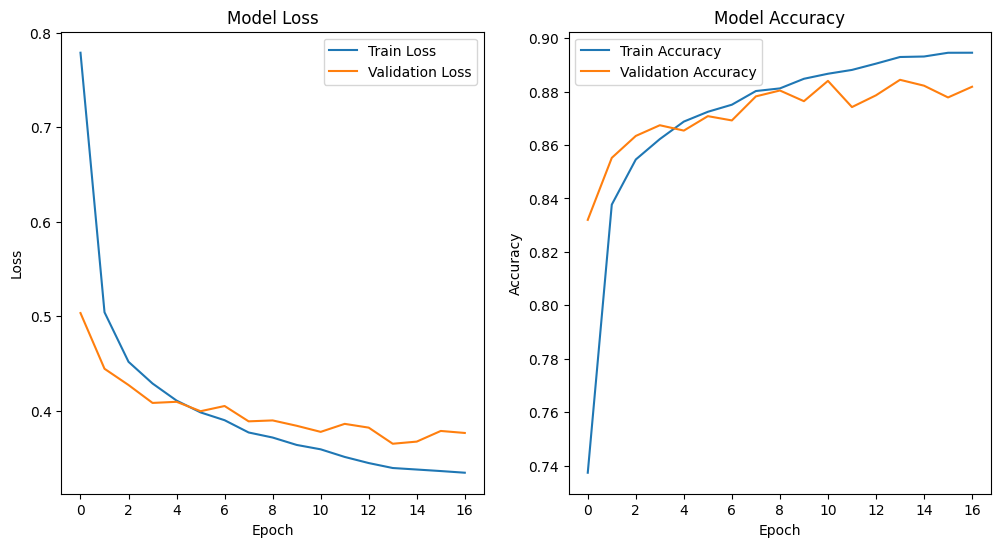

In [57]:
# Extração dos históricos de treinamento e validação
loss = history.history['loss']
val_loss = history.history['val_loss']
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Criando subplots para visualização da perda (loss) e acurácia
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plotando os valores de perda (loss) para treinamento e validação
ax1.plot(loss, label='Train Loss')
ax1.plot(val_loss, label='Validation Loss')
ax1.set_title('Model Loss')  # Definindo o título do gráfico de perda (loss)
ax1.set_xlabel('Epoch')  # Definindo o rótulo do eixo x como "Epoch"
ax1.set_ylabel('Loss')  # Definindo o rótulo do eixo y como "Loss"
ax1.legend()  # Adicionando a legenda ao gráfico

# Plotando os valores de acurácia para treinamento e validação
ax2.plot(accuracy, label='Train Accuracy')
ax2.plot(val_accuracy, label='Validation Accuracy')
ax2.set_title('Model Accuracy')  # Definindo o título do gráfico de acurácia
ax2.set_xlabel('Epoch')  # Definindo o rótulo do eixo x como "Epoch"
ax2.set_ylabel('Accuracy')  # Definindo o rótulo do eixo y como "Accuracy"
ax2.legend()  # Adicionando a legenda ao gráfico

# Exibindo os gráficos
plt.show()

In [58]:
# Avaliando o modelo nos dados de teste
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

# Imprimindo a acurácia obtida nos dados de teste
print('\nTest accuracy:', test_acc)

157/157 - 0s - loss: 0.3744 - accuracy: 0.8794 - 268ms/epoch - 2ms/step

Test accuracy: 0.8794000148773193


Isso significa que o modelo alcançou uma acurácia de aproximadamente \(87.94\%\) nos dados de teste. É uma boa acurácia, considerando que o Fashion MNIST é um conjunto de dados mais desafiador do que o MNIST de dígitos manuscritos.

A saída também fornece algumas outras informações:

- `157/157`: O modelo foi avaliado em 157 lotes (ou batches) de dados. 
- `0s`: A avaliação foi concluída rapidamente.
- `loss: 0.3744`: A perda (ou loss) média nos dados de teste foi de 0.3744. A perda é uma medida de quão bem o modelo está fazendo suas previsões. Quanto menor a perda, melhor.
- `accuracy: 0.8794`: Como mencionado, esta é a acurácia do modelo nos dados de teste.
- `268ms/epoch`: Em média, levou 268 milissegundos para processar uma época durante o treinamento.
- `2ms/step`: Em média, levou 2 milissegundos para processar um lote (ou step) durante o treinamento.

No geral, o modelo parece estar funcionando bem, mas sempre há espaço para melhorias, ajustando a arquitetura do modelo, os hiperparâmetros ou usando técnicas de aumento de dados, por exemplo.